In [ ]:
# notes from a collaborative work session for the 
# text analysis symposium 2018 at Berkeley
# http://www.textxd.org/programs/textxd2018/

# worksheet, hacking around with the case law data from the caselaw access project at
# https://case.law/

# I'm using the illinois data, which is available without registration on the site. 
# in this workbook, I use the jsonl file. You can use the API, but it limits to 100 per page.

# a lot of this is based on the "Text analysis and deep learning tools" session from the
# wednesday session: 
# https://github.com/TextXD/charters4textxd2018/blob/master/notebooks/wem_workshop_textXD18.ipynb

# there's no specific analysis in this workbook
# it's notes from figuring out how to load files, 
# use the GenSim api and so forth

In [2]:
import requests
import json
import re
import gensim
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import strip_non_alphanum
from nltk import word_tokenize

import json

#for visualization
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise
from sklearn.manifold import MDS, TSNE
import matplotlib.pyplot as plt

data = []
with open('data.jsonl') as f:
    for i, line in enumerate(f):
        data.append(json.loads(line))
        # set max of 10,000 rows for now, increase or remove this to get the entire data set
        if i > 10000:
            break

#print(data[0]['casebody']['data']['opinions'][0]['text'])

opinion_texts = []
for i in range(len(data)):
    if data[i]['casebody']['data']['opinions']:
        text = data[i]['casebody']['data']['opinions'][0]['text'].lower()
        text = strip_non_alphanum(text)
        text = remove_stopwords(text)
        opinion_texts.append(text)

tokenized_sentences = []
for s in opinion_texts:
    tokenized_sentences.append(word_tokenize(s))

model = gensim.models.Word2Vec(tokenized_sentences, size=100, window=5, min_count=1, 
                               sg=1, alpha=0.025, iter=5, batch_words=10000, workers=1)

print("model ready")

model ready


In [3]:
# don't print this, too long
#model.wv.vocab

# do this instead
#print(model.wv.index2word[:500])

#print(model.wv.most_similar('laws'))
#print(model.wv.most_similar('tyranny'))

print(len(model.wv.vocab))

model.wv.similarity('awful', 'distressing')

53562


/Users/boushey/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.8620088

In [4]:
#Here are some phrases you might investigate through cosine similarity
#Laws are like cobwebs, which may catch small flies, but let wasps and hornets break through. (Jonathan Swift)
#Law is order, and good law is good order. (Aristotle)
#A law is valuable, not because it is a law, but because there is right in it. (Edmund Burke)
#Lawyers are the only persons in whom ignorance of the law is not punished. (Jeremy Bentham)
#Law is a bottomless pit. (John Arbuthnot)
#Law is not law, if it violates the principles of eternal justice. (LYDIA MARIA CHILD, speech, 1861)
#Bad laws are the worst sort of tyranny. EDMUND BURKE, speech at Bristol previous to the election of 1780

In [12]:
# it would also be interesting to look into word similarities between different body of works (do the associations differ
# between california, new york, illinois, federal?)

In [6]:
model.wv.most_similar(positive=['bad','evil'], negative=['bad','miserable'])

/Users/boushey/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mischief', 0.31626731157302856),
 ('remedied', 0.2352859377861023),
 ('oppression', 0.21919932961463928),
 ('obviate', 0.21347296237945557),
 ('injustice', 0.19215968251228333),
 ('perpetration', 0.19154220819473267),
 ('framers', 0.19043146073818207),
 ('perpetrated', 0.18504667282104492),
 ('prevention', 0.1817876249551773),
 ('palpable', 0.18161918222904205)]

In [7]:
# removing certain vectors from an association
model.wv.most_similar(positive=['good'], negative=['perfect'])

/Users/boushey/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('bad', 0.3552124798297882),
 ('responsible', 0.2637825906276703),
 ('faith', 0.25491130352020264),
 ('honesty', 0.24065282940864563),
 ('butcher', 0.2238735854625702),
 ('hams', 0.2200380265712738),
 ('merchantable', 0.2198537141084671),
 ('glass', 0.21699249744415283),
 ('prosecutor', 0.21670201420783997),
 ('habit', 0.21281872689723969)]

In [8]:
x = [model.wv.similarity('good', word) for word in model.wv.index2word[:10]]
y = [model.wv.similarity('bad', word) for word in model.wv.index2word[:10]]

/Users/boushey/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [9]:
%matplotlib inline

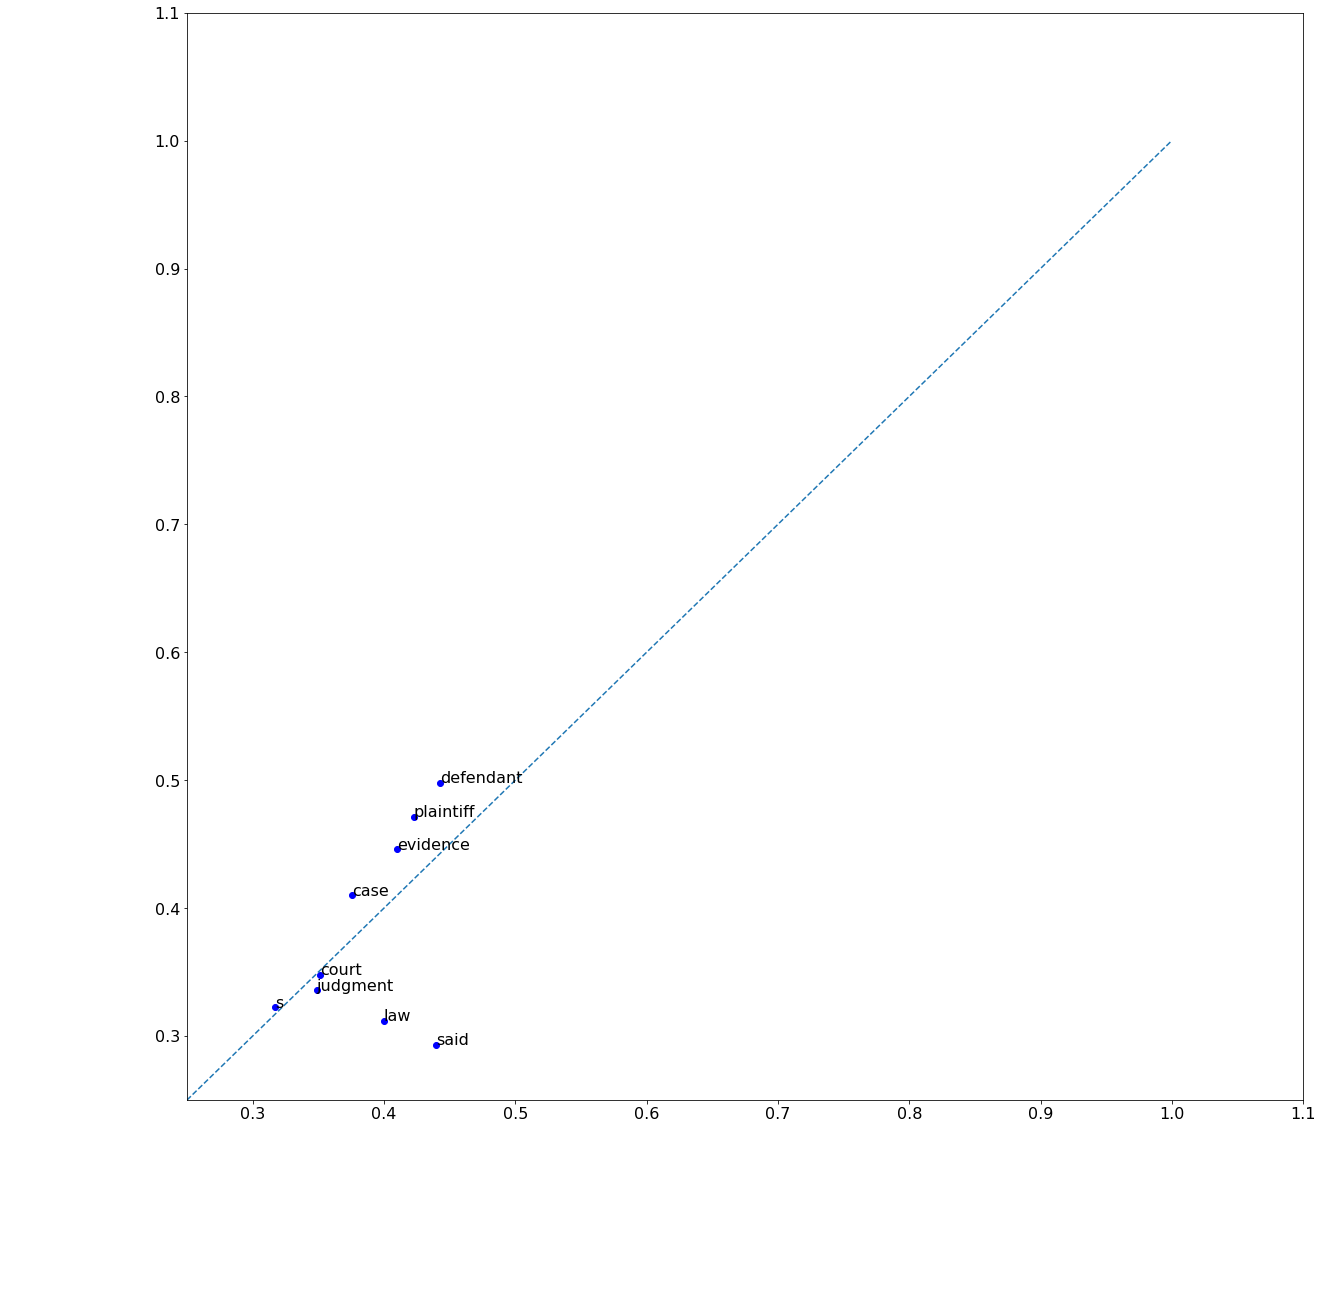

In [29]:
# quick note here - this example was to get a chart working, I don't think this graph has much meaning. 
# this code was lifted from the workshop session (first cell of this workbook for a link)
# this was an exercise in getting it to work with a different set of texts. 
# I subbed in the most common words for the vector of different animals used in the 
import matplotlib
_, ax = plt.subplots(figsize=(20,20))
ax.scatter(x, y, alpha=1, color='b')
for i in range(len(model.wv.index2word[:10])):
    ax.annotate(model.wv.index2word[:10][i], (x[i], y[i])).set_fontsize(16)
ax.set_xlim(.25, 1.1)
ax.set_ylim(.25, 1.1)
ax.yaxis.label.set_fontsize(16)
ax.xaxis.label.set_fontsize(16)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)
plt.plot([0, 1], [0, 1], linestyle='--');